# WebCrawler Test
WebCrawler는 기본적으로 http 통신을 통해서 얻을 수 있는 HTML 데이터에서 우리가 원하는 데이터를 뽑아내는 과정이라고 볼 수 있다. <br>
python에서는 request 라는 통신 라이브러리와 BeauifulSoup라는 Common한 수준에서의 HTML Tag를 추출하는 기능으르 제공하는 라이브러리를 사용하여 간단하게 구현해 볼 수 있다. 기본적으로 추출하고자 하는 데이터가 Json 이나 XML 처럼 정규화된 형태가 없기 때문에 각 사이트 별로 로직을 다르게 구성할 필요가 있을 것이라고 생각된다. 

In [23]:
import requests
from bs4 import BeautifulSoup
import re, json, os, random
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce 
import pandas as pd
from io import StringIO

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
nn_id = "nn123"
nn_wf_ver_id ="1"

print("import common done")

import common done


# 정규 표현식 테스트
정규표현식은 Crawler 에서 필수적인 기능으로 사용법 몇 가지를 테스트해보도록 하겠다. 아래와 같이 몇가지 정규 표현식 예제들을 만들어 보았다. 정규 표현식은 매우 유용하지만 Cralwer 를 개발시에는 조금 불편한 부분들이 있을 수 있다. 이러한 경우 BeautifulSoup 라는 라이브러리를 사용하여 간단하게 사용할 수도 있지만, 정규표현식은 여전히 중요하다고 생각된다. 
- ^ : 시작 
- $ : 끝
- [] : 문자 , 예) [a-z]
- {최소, 최대} : 예) [a-z]{2,3} 
- '+' : '{1,}'
- '?' : '{0,1}'
- '*' : '{0,}'  
- '.' : 모든 문자 가능
- \d : 모든 숫자 
- \w : 모든 문자 
- [^a] : a를 제외한 ! 

In [104]:
import re 

data = "aaabbbcccddsgjs adjkfeklsjdfk jvsklfjsdklf jsdfadffsdf"
tel_no_list = "010-9999-9999, 019-2222-4444, 082-1111-3333, 112, 02-111-1111, 3333-3333"
virtual_html = "<html><body><title>abcd</title><p>가나다라</p><p>마바사아</p></body></html>"

#알파뱃(a~z) 중에서 단어를 찾는다 
reg = re.compile('[a-z]*')
print("1.알파뱃 찾기")
print("IN : {0}".format(reg.findall(data)))
print("OUT : {0}".format(reg.findall(data)))
print('\n')

#알파뱃(a~z) 중에서 두단어를 찾는다 
reg = re.compile('[a-z]{0,5}')
print("2.알파뱃 두단어 찾기")
print("IN : {0}".format(reg.findall(data)))
print("OUT : {0}".format(reg.findall(data)))
print('\n')

# 특정 패턴에 해당하는 전화번호를 다 찾아보자 
reg = re.compile('\d{2,3}-\d{3,4}-\d{4,4}')
print("3.전화번호 패턴 추출")
print("IN : {0}".format(tel_no_list))
print("OUT : {0}".format(reg.findall(tel_no_list)))
print('\n')

# 특정 패턴에 해당하는 전화번호를 다 찾아보자 
# 3333-3333 도 찾아보자 
reg = re.compile('(\d{2,3}-\d{3,4}-\d{4,4}|\d{3,4}-\d{4,4})')
out = reg.findall(tel_no_list)
print("4.전화번호 패턴 추출 (or 문 사용)")
print("IN : {0}".format(tel_no_list))
print("OUT : {0}".format(reg.findall(tel_no_list)))
print('\n')

# 특정 문자를 제외하고 
reg = re.compile('[^a]{1,1}[\w]+$')
print("5.특정 패턴 제외하고 찾기")
print("IN : {0}".format(data))
print("OUT : {0}".format(reg.findall(data)))
print('\n')

# 한글 전체 찾기
reg = re.compile('[가-힣]{1,}')
print("5.한글만 다 찾아 보기")
print("IN : {0}".format(virtual_html))
print("OUT : {0}".format(reg.findall(virtual_html)))
print('\n')

# title 태그 안에 있는 것만 다 가지고 와보자
# (xxx) 은 추출이다 
reg = re.compile('<title[^>]*>([^<]+)</title>')
print("6.Title Tag만 다 찾아보기")
print("IN : {0}".format(virtual_html))
print("OUT : {0}".format(reg.findall(virtual_html)))
print('\n')

# p 태그 안에 있는 것만 다 가지고 와보자
reg = re.compile('<p>([\w]+)</p>')
print("7.P Tag만 다 찾아보기")
print("IN : {0}".format(virtual_html))
print("OUT : {0}".format(reg.findall(virtual_html)))
print('\n')

1.알파뱃 찾기
IN : ['aaabbbcccddsgjs', '', 'adjkfeklsjdfk', '', 'jvsklfjsdklf', '', 'jsdfadffsdf', '']
OUT : ['aaabbbcccddsgjs', '', 'adjkfeklsjdfk', '', 'jvsklfjsdklf', '', 'jsdfadffsdf', '']


2.알파뱃 두단어 찾기
IN : ['aaabb', 'bcccd', 'dsgjs', '', 'adjkf', 'eklsj', 'dfk', '', 'jvskl', 'fjsdk', 'lf', '', 'jsdfa', 'dffsd', 'f', '']
OUT : ['aaabb', 'bcccd', 'dsgjs', '', 'adjkf', 'eklsj', 'dfk', '', 'jvskl', 'fjsdk', 'lf', '', 'jsdfa', 'dffsd', 'f', '']


3.전화번호 패턴 추출
IN : 010-9999-9999, 019-2222-4444, 082-1111-3333, 112, 02-111-1111, 3333-3333
OUT : ['010-9999-9999', '019-2222-4444', '082-1111-3333', '02-111-1111']


4.전화번호 패턴 추출 (or 문 사용)
IN : 010-9999-9999, 019-2222-4444, 082-1111-3333, 112, 02-111-1111, 3333-3333
OUT : ['010-9999-9999', '019-2222-4444', '082-1111-3333', '02-111-1111', '3333-3333']


5.특정 패턴 제외하고 찾기
IN : aaabbbcccddsgjs adjkfeklsjdfk jvsklfjsdklf jsdfadffsdf
OUT : [' jsdfadffsdf']


5.한글만 다 찾아 보기
IN : <html><body><title>abcd</title><p>가나다라</p><p>마바사아</p></body></html>
OUT : ['가

# BeautifulSoup 간단하게 연결해 보기
아래는 간단하게 Naver.com 에 접근하여 Title Tag 값을 추출하는 예제이다. 보는 것처럼 requests 를 호출해서 HTML 데이터를 얻은 후 이 데이터를
BeautifulSoup 를 사용해서 필요한 Tag 를 손쉽게 추출 할 수 있다. 정규식아라고 하면 아래와 같은 형태로 구현이 되어야 할 것이지만 라이브러리를 사용하면 더욱 손 쉽게 사용가능하다. <br>
- reg = re.compile("<title[^>]*>([^<]+)</title>") <br>
- soup.find_all('title')<br>

In [15]:
def crawler(iter) : 
    url = "http://naver.com"
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text , 'lxml')
    for raw in soup.find_all('title') : 
        print(raw)
crawler(1)

<title>NAVER</title>


# BeautifulSoup 간단하게 Table Parsing 해보기
HTML Table 을 Parsing 해서 간단하게 csv 로 바꿔보자. BeautifulSoup 이 얼마나 편한지 알 수 있다. 마치 Jquery 를 하는것 처럼 Elements 를 따라가면서 Find method 를 사용하고 마치 JQuery Iter 작업 처럼 복수의 요소를 쉽게 검색할 수 있다. 

In [11]:
# 엄청간단하게 table 을 파싱할 수 있다 
def crawler_csv() : 
    url = "https://race.kra.co.kr/raceScore/ObjtRaceRaceList.do?Act=04&Sub=3&meet=3"
    return_line = []
    return_header = ""
    return_td = ""
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, 'lxml')
    
    div = soup.find('div', class_="tableType2")
    for th in div.find_all('th') : 
        return_header = return_header + th.text + ','
    for tr in div.find_all('tr') :
        for td in tr.find_all('td') : 
            return_td = return_td + td.text + ','
        return_td = return_td.rstrip(',') + '\\n'
    return (return_header.rstrip(',') + '\\n' + return_td)
    
test_set = crawler_csv()
# pandas 를 이용해서 컨버팅한 데이터가 정상인지 한번 확인해 보자
test_data = StringIO(test_set)
#print(test_data)
df = pd.read_csv(test_data, sep=",")
df.to_csv("/home/dev/csv/test.csv", sep=',', encoding='utf-8')
print("csv save done")

csv save done


# Site 에 존재하는 복수의 테이블을 저장해 보자
물론 여기서는 Table , Tr, Td 의 전형적인 구조라고 가정한다. 

In [27]:
def save_as_csv(data) :
    """
    랜덤하게 csv 이름을 생성하여 주어진 데이터를 저장 
    """
    rand_name = random.randrange(1,10000)
    save_data = StringIO(data)
    df = pd.read_csv(save_data, sep=",")
    df.to_csv("/home/dev/csv/" + str(rand_name) + ".csv", sep=',', encoding='utf-8')
    
def table_to_csv(url) : 
    """
    전형적인 형태의 Table 을 Parsing 하여 csv 로 저장한다 
    """
    return_line = []
    return_td = ""
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, 'lxml')
    for table in soup.find_all('table') :
        for tr in table.find_all('tr') :
            for td in table.find_all('td') :
                return_td = return_td + td.text + ','
            return_td = return_td.rstrip(',') + '\\n'
        # save each table 
        save_as_csv(return_td)
        return_td = ""
    
table_to_csv("https://ko.wikipedia.org/wiki/")

# Wikipedia 한글 페이지 Link를 따라가면서 데이터 수집
아주 간단한 WebCralwer 를 테스트 해보았다. 간단하게 WikiPedia 한글 사이트를 처음으로 시작해서 해당 사이트에 존재하는 "P" 태그를 수집하고 해당 페이지에서 존재하는 Link를 찾아서 이동하고, 해당 페이지에서 "P" 태그를 찾아서 저장하는 행위를 반복하는 코드이다.  <br>
별도의 정규 표현식을 이용하고 싶을 경우에는 정규 표현식을 파라메터로 받아서 해당 정규 표현식으로 Crawler 작업을 실행한다. <br> 
메서드는 spider(2, 'https://ko.wikipedia.org/wiki/') 형태로 되어 있으며, 첫 번째 파레메터는 Inception Level로 몇번이나, Link를 따라 들어가서 Crawler 작업을 수행할 것인지를 지정하는 작업이고, 두 번째 파라메터는 시작할 사이트의 주소가 되겠다. 실제로 실행시 지정한 페이지뿐만 아니라 연결된 Link들을 계속 찾아서 필요한 데이터를 추출하는 것을 볼 수 있다. 세번째 파라메터로 정규 표현식을 입력 받으며, 해당 값이 있는 경우 정규 표현식을 활용하여 파싱 작업을 수행한다. 

In [29]:
def task(page, max_pages, url_path, file_w, reg = None):
    """
    지정된 수만큼 제귀 형태로 모든 링크를 따라가서 전부 수집한다. 
    """
    if page == max_pages :
        get_single_article(url_path, file_w, reg_exp=str(reg))
        table_to_csv(url_path)
    else : 
        get_single_article(url_path, file_w, reg_exp=str(reg))
        table_to_csv(url_path)
        source_code = requests.get(url_path)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text, 'lxml')
        page += 1
        for link in soup.find_all('a'):
            href = link.get('href')
            if (href != None and re.search("https://ko", href)) : 
                task(page, max_pages, href, file_w, reg=str(reg))

def get_single_article(item_url, file_w, reg_exp = None):
    """
    p 태그를 가지고와서 파싱하거나 
    지정된 reg_exp 를 사용하여 파싱한다 
    """
    print("href : {0}".format(item_url))
    source_code = requests.get(item_url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, 'lxml')
    
    if(reg_exp) : 
        #정규 표현식이 있는 경우 해당 정규 표현식에 맞는 데이터를 추출 
        reg = re.compile(reg_exp)
        for contents in reg.findall(plain_text):
            file_w.write(contents)
    else : 
        #별도의 Regex가 없는 경우 p tag 에 있는 모든 데이터 추출 
        for contents in soup.find_all('p'):
            file_w.write(contents.text)

def spider(max_pages, url_path, path = "/home/dev/wiki/", file_name='test.txt', reg_exp = None) :
    """
    본 Function 을 실행하면 WikiPedia 첫 페이지에서 실행해서 
    지정된 횟수만큼 페이지를 따라 들어가서 정해진 패턴을 수집한다. 
    max_pages : 몇번 Page를 따라 들어갈 것인가를 정의하는 변수 
    """
    if not os.path.exists(path):
        os.makedirs(path)
    with open(''.join([path, file_name]), "w") as file_w :   
        print("# Job Start!!")
        task(1, max_pages, url_path, file_w, reg = reg_exp)
        print("# Job Done!!")

def save_as_csv(data) :
    """
    랜덤하게 csv 이름을 생성하여 주어진 데이터를 저장 
    """
    rand_name = random.randrange(1,10000)
    save_data = StringIO(data)
    df = pd.read_csv(save_data, sep=",")
    df.to_csv("/home/dev/csv/" + str(rand_name) + ".csv", sep=',', encoding='utf-8')
    print("file saved as : {0}".format(str(rand_name)))
    
def table_to_csv(url) : 
    """
    전형적인 형태의 Table 을 Parsing 하여 csv 로 저장한다 
    """
    try : 
        return_line = []
        return_td = ""
        source_code = requests.get(url)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text, 'lxml')
        for table in soup.find_all('table') :
            for tr in table.find_all('tr') :
                for td in table.find_all('td') :
                    return_td = return_td + td.text + ','
                return_td = return_td.rstrip(',') + '\\n'
            # save each table 
            save_as_csv(return_td)
            return_td = ""
    except Exception as e : 
        return True
        
# 주어진 횟수만큼 해당 사이트를 시작으로 크롤링 시작 
# first parm : Inception 횟수 
# second parm : initial site 
# reg_exp : 정규 표현식 사용 가능 

# (1) 정규 표현식 사용 CASE (한글 전체 추출)
spider(2, 'https://ko.wikipedia.org/wiki/', reg_exp ='[가-힣\s]{1,}')
#spider(2, 'https://ko.wikipedia.org/wiki/', reg_exp ='<title[^>]*>([^<]+)</title>')

# (2) 정규 표현식 사용하지 않고 P 태크 추출
#spider(2, 'https://ko.wikipedia.org/wiki/')

# Job Start!!
href : https://ko.wikipedia.org/wiki/
file saved as : 4778
file saved as : 1311
file saved as : 6489
file saved as : 1375
href : https://ko.wiktionary.org/wiki/
href : https://ko.wiktionary.org/wiki/
href : https://ko.wikinews.org/wiki/
href : https://ko.wikinews.org/wiki/
href : https://ko.wikisource.org/wiki/
href : https://ko.wikisource.org/wiki/
href : https://ko.wikiversity.org/wiki/
file saved as : 8018
file saved as : 4965
file saved as : 1435
href : https://ko.wikiversity.org/wiki/
file saved as : 3027
file saved as : 8234
file saved as : 8343
href : https://ko.wikivoyage.org/wiki/
file saved as : 6115
href : https://ko.wikivoyage.org/wiki/%EB%8C%80%EB%AC%B8
file saved as : 2508
href : https://ko.wikiquote.org/wiki/
file saved as : 5292
file saved as : 6980
file saved as : 9725
file saved as : 1458
file saved as : 2851
href : https://ko.wikiquote.org/wiki/
file saved as : 1571
file saved as : 4879
file saved as : 6796
file saved as : 2617
file saved as : 8588
href

# Word2Vec with Hoyai - Net Define
Word2Vec 훈련 및 서비스는 Djnago REST Service 기반으로 구현해 보자. 간단하게 사용하고자 하는 네트워크를 정의한다. 

In [120]:
# Seq - 1
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/',
                     json={
                         "biz_cate": "MES",
                         "biz_sub_cate": "M60",
                         "nn_title" : "test",
                         "nn_desc": "test desc",
                         "use_flag" : "Y",
                         "dir": "purpose?",
                         "config": "N"
                     })
data = json.loads(resp.json())
print("1.evaluation result : {0}".format(data))

# Seq - 2
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/version/',
                 json={
                     "nn_def_list_info_nn_id": "",
                     "nn_wf_ver_info": "test version info",
                     "condition": "1",
                     "active_flag": "Y"
                 })
data = json.loads(resp.json())
print("2.evaluation result : {0}".format(data))

# Seq - 3
resp = requests.post('http://' + url + '/api/v1/type/wf/target/init/mode/simple/'+ nn_id + '/wfver/1/',
                     json={
                         "type": "word2vec"
                     })
data = json.loads(resp.json())
print("3.evaluation result : {0}".format(data))


1.evaluation result : nn123
2.evaluation result : nn123
3.evaluation result : word2vec


# Word2Vec with Hoyai - Train Node Define
Train 하고자 하는 데이터, POS 전처리 방법 등을 지정한다 

In [135]:
# Seq - 4
return_dict = {}
return_dict['test'] = open('/home/dev/wiki/test.txt', 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/data_node/',
                     files = return_dict)

data = json.loads(resp.json())
print("4.evaluation result : {0}".format(data))

# Seq - 5
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/source/nnid/'+ nn_id + '/ver/1/node/data_node/',
                     json={
                         "source_server": "local",
                         "source_sql": "all",
                         "max_sentence_len" : 10
                     })
data = json.loads(resp.json())
print("5.evaluation result : {0}".format(data))

# Seq - 6
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/pre/nnid/'+ nn_id + '/ver/1/node/data_node/',
                     json={
                         "preprocess":  "mecab",
                     })
data = json.loads(resp.json())
print("6.evaluation result : {0}".format(data))

# Seq - 7
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/store/nnid/'+ nn_id + '/ver/1/node/data_node/')
data = json.loads(resp.json())
print("7.evaluation result : {0}".format(data))

# Seq - 8
resp = requests.get('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/source/nnid/'+ nn_id + '/ver/1/node/data_node/')
data = json.loads(resp.json())
print("8.evaluation result : {0}".format(data))

4.evaluation result : ['1 file upload success']
5.evaluation result : {'source_type': 'local', 'preprocess': 'mecab', 'store_path': '/hoya_str_root/nn123/1/data_node', 'source_parse_type': 'raw', 'max_sentence_len': 10, 'source_path': '/hoya_src_root/nn123/1/data_node', 'source_sql': 'all', 'source_server': 'local'}
6.evaluation result : mecab
7.evaluation result : /hoya_str_root/nn123/1/data_node
8.evaluation result : {'source_type': 'local', 'preprocess': 'mecab', 'store_path': '/hoya_str_root/nn123/1/data_node', 'source_parse_type': 'raw', 'max_sentence_len': 10, 'source_path': '/hoya_src_root/nn123/1/data_node', 'source_sql': 'all', 'source_server': 'local'}


# Word2Vec with Hoyai - Word2Vec Net 정의
- window_size : c-bow 알고리즘으로 테스트 데이터 생성시 기준 단어로부터 얼만큼 떨어진 데이터까지 가지고 올 것인지 지정 
- vector_size : embedding 하려는 Vector의 Size (결과의 사이즈가 될 것) 
- batch_size : HDF5 에서 한번에 가지고올 데이터의 사이즈 
- iter : Hidden Layer 하나짜리 신경망 훈련시 몇번 반복할 것인가 
- min_count : Dict 구성시 몇번 이상 발생해야 사전에 추가할 것인가 

In [122]:
# Seq - 9
resp = requests.put('http://' + url + '/api/v1/type/wf/state/netconf/detail/w2v/nnid/' + nn_id + '/ver/' + nn_wf_ver_id + '/node/netconf_node/',
                     json={
                        "window_size" : 5,
                        "vector_size" : 100,
                        "batch_size" : 100,
                        "iter" : 5,
                        "min_count" : 1
                     })
data = json.loads(resp.json())
print("9.evaluation result : {0}".format(data))

9.evaluation result : {'vector_size': 100, 'batch_size': 100, 'min_count': 1, 'window_size': 5, 'model_path': '/hoya_model_root/nn123/1/netconf_node', 'iter': 5}


# Word2Vec with Hoyai - 테스트에 사용할 데이터 
Train 에 사용하지 않은 새로운 데이터로 테스트를 실행하기 위한 정의 

In [133]:


# Seq - 10
return_dict = {}
return_dict['test'] = open('/home/dev/wiki/test.txt', 'rb')
resp = requests.post('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/source/nnid/'+ nn_id + '/ver/1/node/test_data_node/',
                     files = return_dict)
data = json.loads(resp.json())
print("10.evaluation result : {0}".format(data))

# Seq - 11
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/source/nnid/'+ nn_id + '/ver/1/node/test_data_node/',
                     json={
                         "source_server": "local",
                         "source_sql": "all",
                         "max_sentence_len" : 50
                     })
data = json.loads(resp.json())
print("11.evaluation result : {0}".format(data))

# Seq - 12
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/pre/nnid/'+ nn_id + '/ver/1/node/test_data_node/',
                     json={
                         "preprocess":  "mecab",
                     })
data = json.loads(resp.json())
print("12.evaluation result : {0}".format(data))

# Seq - 13
resp = requests.put('http://' + url + '/api/v1/type/wf/state/textdata/src/local/form/raw/prg/store/nnid/'+ nn_id + '/ver/1/node/test_data_node/')
data = json.loads(resp.json())
print("13.evaluation result : {0}".format(data))

node_name = 'eval_node'
resp = requests.put('http://' + url + '/api/v1/type/wf/state/eval/nnid/'+nn_id+'/ver/1/node/eval_node/',
                    json={
                        "type": "w2v",
                    })
data = json.loads(resp.json())
print("14.evaluation result : {0}".format(data))

10.evaluation result : ['1 file upload success']
11.evaluation result : {'source_type': 'local', 'preprocess': 'mecab', 'store_path': '/hoya_str_root/nn123/1/test_data_node', 'source_parse_type': 'raw', 'max_sentence_len': 50, 'source_path': '/hoya_src_root/nn123/1/test_data_node', 'source_sql': 'all', 'source_server': 'local'}
12.evaluation result : mecab
13.evaluation result : /hoya_str_root/nn123/1/test_data_node
14.evaluation result : {'type': 'w2v'}


# Word2Vec with Hoyai - 모델 훈련 시작 ! 
지금까지 정의한 기준 정보를 가지고 실제 모델 훈련을 시작한다. 

In [136]:
# Seq - 14
resp = requests.post('http://' + url + '/api/v1/type/runmanager/state/train/nnid/'+nn_id+'/ver/'+nn_wf_ver_id+'/')
data = json.loads(resp.json())
print("14.evaluation result : {0}".format(data))

14.evaluation result : [None, None, None, None, 0, {'word': [], 'x': [], 'y': []}]


# Vector 확인
단어를 차원에 Embeddning 한다는 것이 어떤 의미인지 한번 테스트를 해보도록 하자. 단어를 차원에 Embedding 하게 되면 얻는 장점은 명확하다. 단어간의 유사도를 찾아 낼 수 있다는 것. 두번째는 OneHot Encoder 대비 더 적은 차원수로 단어를 표현할 수 있다는 것이 되겠다. 첫번째의 장점은 우리가 복잡한 NLP 서비스를 만들려고 했을때, AI 가 더 다양한 표현들을 잘 이해할 수 있도록 하는데 굉장히 효과적이다. 다만 유의어 동의어 등에 대한 처리에 대해서는 W2v 만으로는 한계가 있다. 

In [142]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/w2v/nnid/' + nn_id + '/ver/active/',
                     json={
                         "type": "vector",
                         "val_1":["포털", "한복"],
                         "val_2":[]
                        }
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [[0.3671122193336487, 0.36258116364479065, -0.153810515999794, 0.3382582664489746, 0.07524526864290237, -0.9237509369850159, 0.586235761642456, -0.7128365635871887, -0.1618472784757614, -1.7198208570480347, -0.45088905096054077, -1.8178998231887817, 0.255445659160614, 0.6051250100135803, 1.6374379396438599, -0.3707364499568939, 0.6106436252593994, -0.010830960236489773, 0.7528746724128723, -0.09685423225164413, -0.17752382159233093, 0.3827434182167053, 0.1822998821735382, -0.8178929686546326, 0.9471759796142578, 0.8136753439903259, 0.324432909488678, 0.6151374578475952, -0.09854627400636673, -0.22025443613529205, 0.7294281721115112, -1.5659046173095703, 0.0959482342004776, -0.34772005677223206, -0.38805946707725525, 0.30053871870040894, 0.7075024247169495, -0.16250531375408173, -0.1269727349281311, 1.136719822883606, -0.10086284577846527, 0.5233539938926697, 0.20110321044921875, -0.6678069233894348, -0.5378274917602539, 0.9875825047492981, -0.49586984515190125, 0.62

# 연관 단어 검색
유사도 테스트를 한번 해보자 첫번째 파라메터는 긍정요인, 두번째 파라메터는 부정요인이다. 인터넷에서 우리가 찾아보면 가장 많아 나오는 예제가 바로 king - Man = Queen과 같은 형태로 표현하는 것을 생각해 볼 수 있겠다. 

In [117]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/w2v/nnid/' + nn_id + '/ver/active/',
                     json={
                         "type": "sim",
                         "val_1":["어업"],
                         "val_2":[""]
                     }
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [[['으로/JKB', 0.999835729598999], ['고/EC', 0.9998282194137573], ['는/JX', 0.9998234510421753], ['한복/NNG', 0.9998130202293396], [',/SC', 0.9998108148574829]]]


# 단어간의 유사도 테스트
두개의 단어를 넣고 유사도를 테스트해 볼 수도 있다. 당연히 1에 가까울 수록 두 단어 간의 상관성이 높다고 판단할 수 있다. 

In [170]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/w2v/nnid/' + nn_id + '/ver/active/',
                     json={
                         "type": "similarity",
                         "val_1":["포털"],
                         "val_2":["윤리"]
                     }
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [-0.2208110638145097]


# Plot 을 통해서 시각화
각 단어의 vecotr 값을 Plot 을 통해서 화면에 출력하여 보자. 입력한 단어의 Vector를 서버에서 받아서 해당 vector 를 2D로 변경한 후에 plot 을 통해서 화면에 출력해 주었다 . 

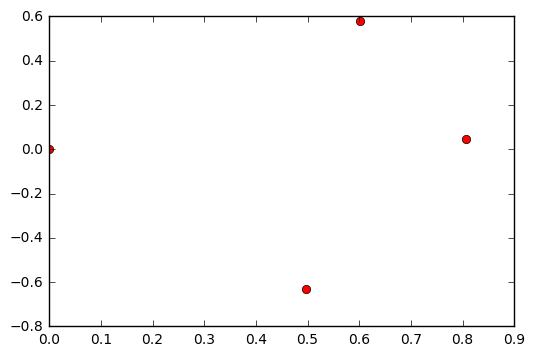

In [181]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/w2v/nnid/' + nn_id + '/ver/active/',
                     json={
                         "type": "vector",
                         "val_1":["포털", "한복","한국", "으로"],
                         "val_2":[]
                        }
                     )
data = json.loads(resp.json())

def avg(x,y) : 
    """
    그냥 Numpy 써도 됨 재미로.. 
    """
    return (x+y)/2

x = []
y = []
for raw in data : 
    x.append(np.var(raw).tolist())
    y.append(reduce(lambda x, y: avg(x,y), raw))

# 원래 그냥 Gensim 모델을 사용해서 Vecotor를 뿌려주면 됨 
# 여기서는 그냥 테스트를 위해서 두개의 백터를 받아서 다차원을 
# x 는 평균, y는 분산을 구해서 출력하였음 
myvec = np.array([x,y])
plt.plot(myvec[0,],myvec[1,],'ro')
plt.show()